In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import *
import matplotlib.pyplot as plt    # basic plotting library
import seaborn as sns

In [2]:
df = pd.read_csv("HTRU_2.csv", header=None)
df.rename(columns={0: "mean_int_pf", 1: "std_pf", 2: "ex_kurt_pf", 3: "skew_pf", 4: "mean_dm", 5: "std_dm", 6: "kurt_dm", 7: "skew_dm", 8: "class"}, inplace = True)
df.index = df.index + 1
df.head(10)

,mean_int_pf,std_pf,ex_kurt_pf,skew_pf,mean_dm,std_dm,kurt_dm,skew_dm,class
1,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
2,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
3,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
4,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
5,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
6,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
7,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
8,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
9,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
10,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [3]:
print("mean_int_pf: ",len(df['mean_int_pf'].unique()))
print("std_pf: ",len(df['std_pf'].unique()))
print("ex_kurt_pf: ",len(df['ex_kurt_pf'].unique()))
print("skew_pf: ",len(df['skew_pf'].unique()))
print("mean_dm: ",len(df['mean_dm'].unique()))
print("std_dm: ",len(df['std_dm'].unique()))
print("kurt_dm: ",len(df['kurt_dm'].unique()))
print("skew_dm: ",len(df['skew_dm'].unique()))

mean_int_pf:  8626
std_pf:  17862
ex_kurt_pf:  17897
skew_pf:  17898
mean_dm:  9000
std_dm:  17894
kurt_dm:  17895
skew_dm:  17895


### Missing Data Check

In [4]:
df.info()
# This will display the detailed information, like there is no missing data in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 1 to 17898
Data columns (total 9 columns):
mean_int_pf    17898 non-null float64
std_pf         17898 non-null float64
ex_kurt_pf     17898 non-null float64
skew_pf        17898 non-null float64
mean_dm        17898 non-null float64
std_dm         17898 non-null float64
kurt_dm        17898 non-null float64
skew_dm        17898 non-null float64
class          17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


### Check Imbalanced Dataset

In [5]:
df['class'].value_counts()
# It shows data is unbalanced

0    16259
1     1639
Name: class, dtype: int64

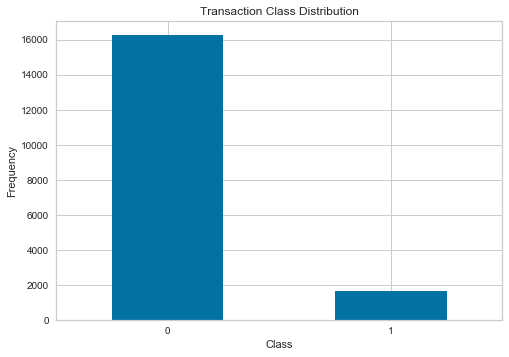

In [102]:
count_classes = pd.value_counts(df['class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

#plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")
plt.savefig('13.png')

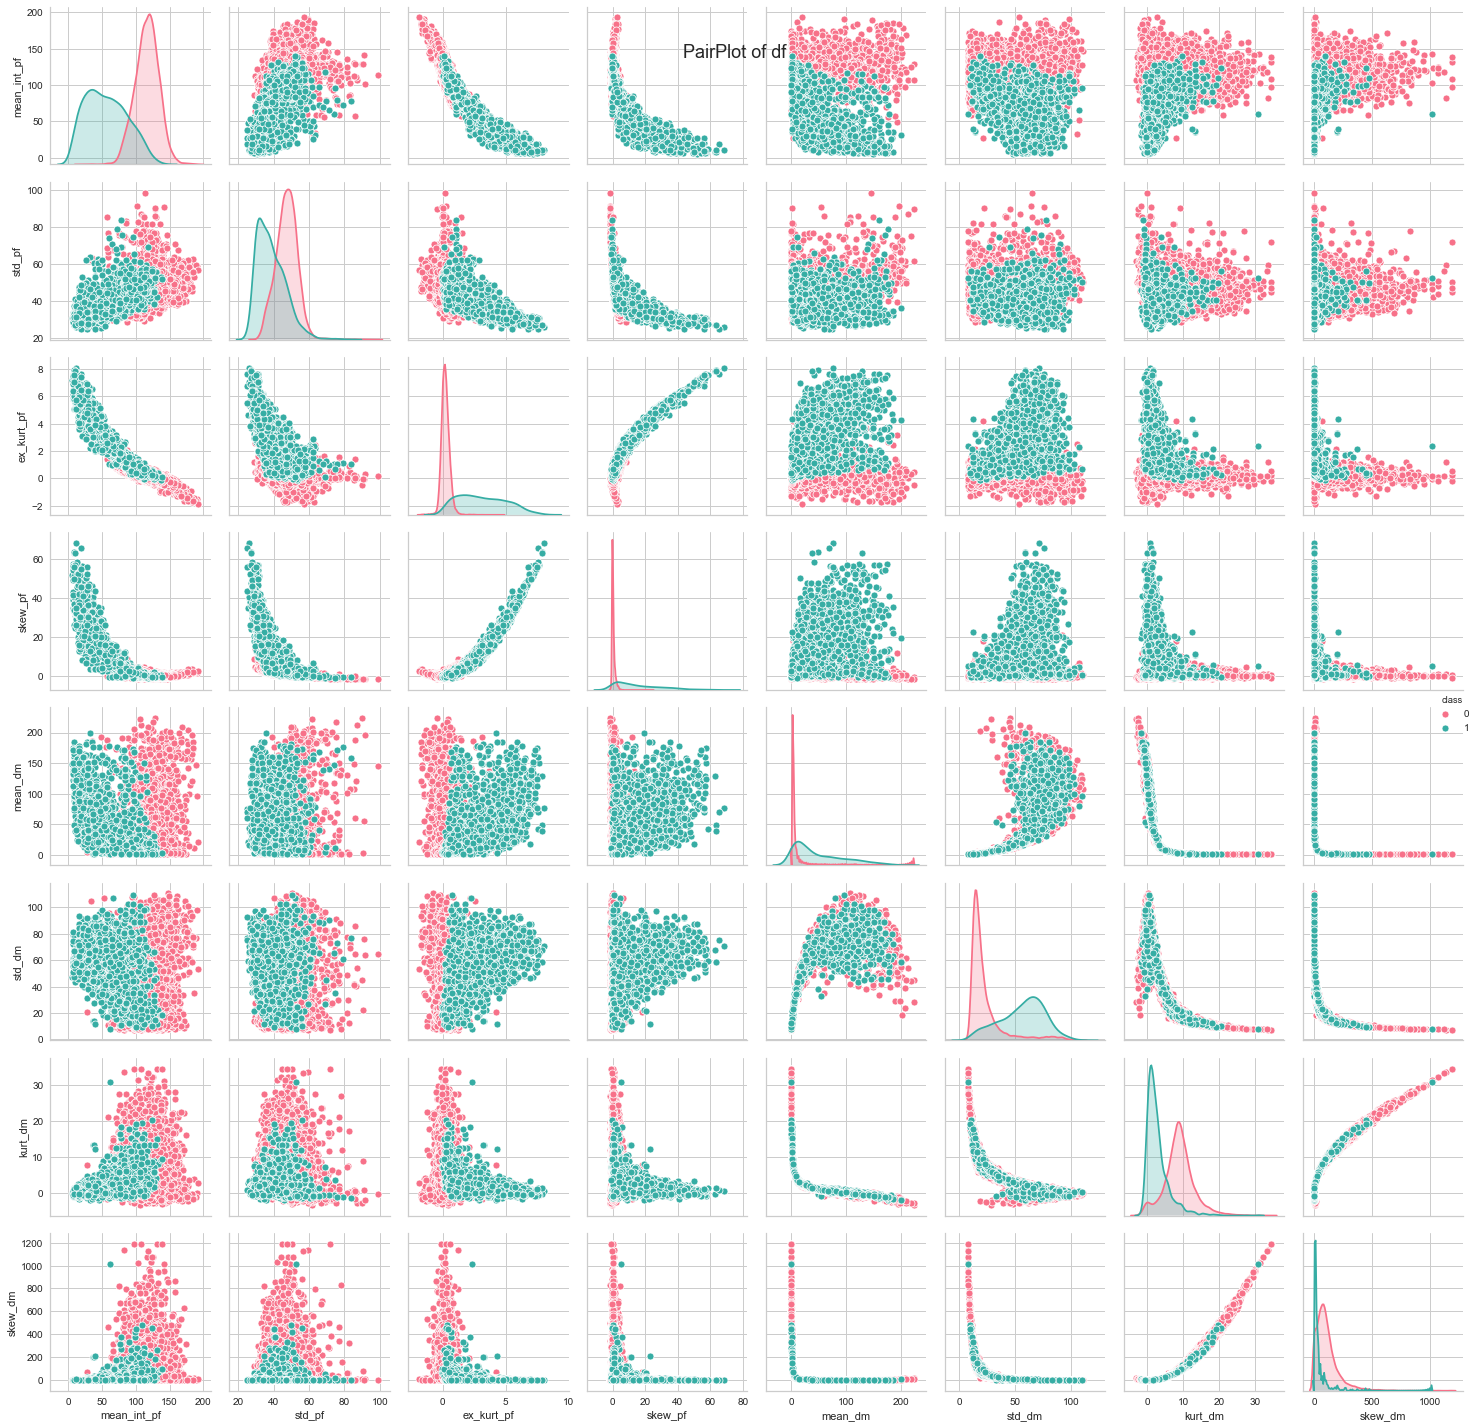

<Figure size 576x396 with 0 Axes>

In [103]:
sns.pairplot(data=df,
             palette="husl",
             hue="class",
             vars=["mean_int_pf",
                   "std_pf",
                   "ex_kurt_pf",
                   "skew_pf",
                   "mean_dm",
                   "std_dm",
                   "kurt_dm",
                   "skew_dm"])

plt.suptitle(" \n PairPlot of df \n \n ",fontsize=18)

plt.tight_layout()
plt.show()   # pairplot without standard deviaton fields of data
plt.savefig('14.png')

#### data shows its a good correlation between following fields.

#### There are good correlation between ex_kurt_pf and skew_pf and there is a significant correlation between ex_kurt_pf and class.

#### There is good correlation between mean_dm and std_dm

#### There are good correlation between std_dm and mean_dm and inverse correlation between std_dm and kurt_dm

#### There is good correlation between kurt_dm and skew_dm

#### There is good correlation between skew_dm and kurt_dm

#### Our target variable has good correlation with ex_kurt_pf and skew_pf variables

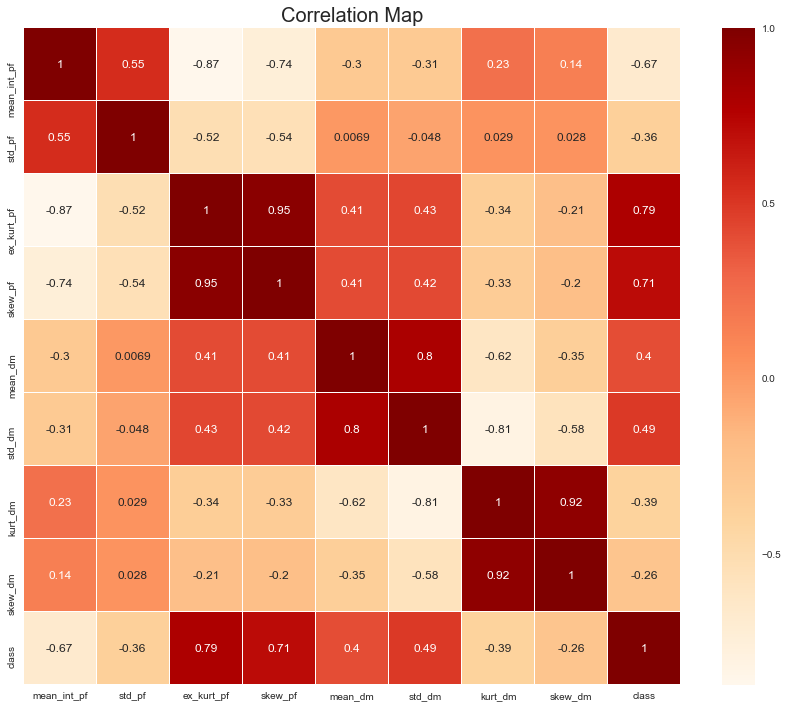

<Figure size 576x396 with 0 Axes>

In [105]:
plt.figure(figsize=(12,10))
#sns.heatmap(data=df.corr(),annot=True,cmap="bone",linewidths=1,fmt=".2f",linecolor="gray")
#plt.figure(figsize=(17,8))
cbar_kws = { 'ticks' : [-1, -0.5, 0, 0.5, 1], 'orientation': 'vertical'}
sns.heatmap(df.corr(), cbar_kws=cbar_kws, cmap='OrRd', annot=True, linewidths=0.3)
plt.xticks(rotation=0)
plt.title("Correlation Map",fontsize=20)
plt.tight_layout()
plt.show()
plt.savefig('15.png')

#### Lightest and darkest cells are most correlated ones
#### Most of our Columns are already related or derived from one or another. And we can see it clearly on some Cells above

### Check Outliers

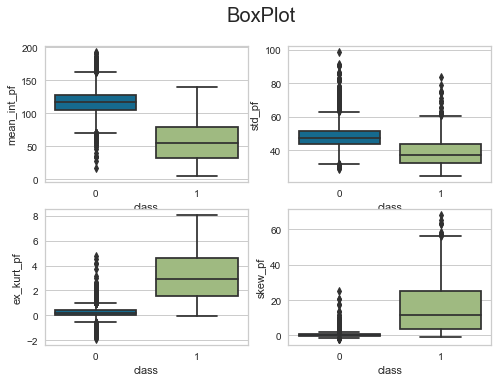

<Figure size 576x396 with 0 Axes>

In [106]:
plt.subplot(2,2,1)
sns.boxplot(data=df,y="mean_int_pf",x="class")

plt.subplot(2,2,2)
sns.boxplot(data=df,y="std_pf",x="class")

plt.subplot(2,2,3)
sns.boxplot(data=df,y="ex_kurt_pf",x="class")

plt.subplot(2,2,4)
sns.boxplot(data=df,y="skew_pf",x="class")

plt.suptitle("BoxPlot",fontsize=20)

plt.show()
plt.savefig('16.png')

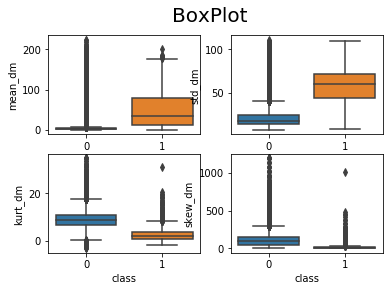

In [10]:
plt.subplot(2,2,1)
sns.boxplot(data=df,y="mean_dm",x="class")

plt.subplot(2,2,2)
sns.boxplot(data=df,y="std_dm",x="class")

plt.subplot(2,2,3)
sns.boxplot(data=df,y="kurt_dm",x="class")

plt.subplot(2,2,4)
sns.boxplot(data=df,y="skew_dm",x="class")

plt.suptitle("BoxPlot",fontsize=20)

plt.show()

### Histogram distribution

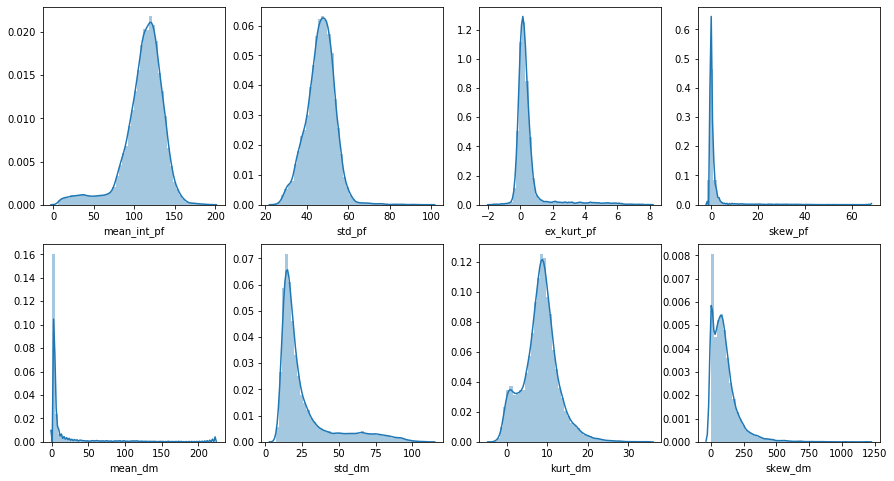

In [11]:
f, axes = plt.subplots(2,4, figsize=(15, 8))
sns.distplot(df["mean_int_pf"], ax=axes[0,0])
sns.distplot(df["std_pf"], ax=axes[0,1])
sns.distplot(df["ex_kurt_pf"], ax=axes[0,2])
sns.distplot(df["skew_pf"], ax=axes[0,3])
sns.distplot(df["mean_dm"], ax=axes[1,0])
sns.distplot(df["std_dm"], ax=axes[1,1])
sns.distplot(df["kurt_dm"], ax=axes[1,2])
sns.distplot(df["skew_dm"], ax=axes[1,3])

#### Above graph representation shows that data is left skewed in following parameters.
#### mean_dm, std_dm, skew_pf, ek_kurt_pf, skew_dm, std_dm
#### Data of following columns are normally distributed
#### mean_df and kurt_dm

### Creating Base Model Prediction

In [12]:
base_model = setup(data = df, target = 'class', log_experiment = True, experiment_name = "Base Model")
best_base_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.9807,0.9747,0.8561,0.9276,0.8899,0.8793,0.8805,0.6793
1,Light Gradient Boosting Machine,0.9806,0.9766,0.8578,0.9254,0.8897,0.8791,0.8802,0.214
2,Extra Trees Classifier,0.9804,0.9713,0.8395,0.9404,0.8868,0.8761,0.878,0.252
3,CatBoost Classifier,0.9803,0.9777,0.8543,0.9248,0.8876,0.8769,0.878,10.26
4,Logistic Regression,0.9796,0.9743,0.8264,0.9439,0.8804,0.8693,0.8721,0.155
5,Random Forest Classifier,0.9796,0.9544,0.836,0.9346,0.882,0.8708,0.8728,0.1173
6,Ada Boost Classifier,0.9788,0.9766,0.8273,0.9336,0.8763,0.8647,0.8672,0.6763
7,Gradient Boosting Classifier,0.9783,0.9753,0.85,0.9079,0.877,0.8652,0.8663,2.747
8,Linear Discriminant Analysis,0.975,0.9758,0.7646,0.9537,0.848,0.8346,0.841,0.0192
9,K Neighbors Classifier,0.9721,0.9367,0.7794,0.9031,0.8359,0.8208,0.8239,0.0261


#### Train Dataset 70%
#### Test Dataset 30%
#### Normalization Robust Method
#### Imbalanced Method - SMOTE
#### MLFlow Logging

In [3]:
stage_1 = setup(data = df, target = 'class', normalize = True, normalize_method = 'robust', fix_imbalance = True, log_experiment = True, experiment_name = 'Normalization & SMOTE')
best_stage_1 = compare_models(whitelist = ['lr', 'lda', 'qda', 'knn', 'nb', 'svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Linear Discriminant Analysis,0.9765,0.9752,0.8797,0.8677,0.8731,0.8602,0.8605,0.03
1,Logistic Regression,0.9676,0.9772,0.9049,0.7799,0.8369,0.819,0.8224,0.1238
2,Quadratic Discriminant Analysis,0.9662,0.963,0.8692,0.7862,0.8251,0.8064,0.808,0.0096
3,SVM - Linear Kernel,0.9508,0,0.911,0.681,0.7765,0.7498,0.7616,0.078
4,K Neighbors Classifier,0.9468,0.951,0.9032,0.6524,0.7571,0.7281,0.7406,0.0499
5,Naive Bayes,0.9378,0.955,0.8614,0.6155,0.7176,0.6837,0.6962,0.0066


#### Create Linear Discriminant Analysis Model

In [4]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9816,0.9737,0.8947,0.9027,0.8987,0.8886,0.8886
1,0.9824,0.9871,0.8783,0.9266,0.9018,0.8922,0.8925
2,0.9792,0.964,0.8609,0.9083,0.8839,0.8725,0.8729
3,0.9816,0.9841,0.9043,0.8966,0.9004,0.8903,0.8903
4,0.9777,0.9855,0.9304,0.8425,0.8843,0.872,0.8733
5,0.9713,0.9707,0.8522,0.8376,0.8448,0.829,0.829
6,0.9729,0.9733,0.887,0.8293,0.8571,0.8422,0.8428
7,0.9745,0.9746,0.8609,0.8609,0.8609,0.8468,0.8468
8,0.9776,0.9792,0.8772,0.8772,0.8772,0.8649,0.8649
9,0.9665,0.9594,0.8509,0.7951,0.822,0.8035,0.8041


#### Tune Linear Discriminant Analysis Model

In [5]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9808,0.9743,0.8947,0.8947,0.8947,0.8842,0.8842
1,0.9816,0.9874,0.8783,0.9182,0.8978,0.8877,0.888
2,0.9792,0.9639,0.8609,0.9083,0.8839,0.8725,0.8729
3,0.9808,0.985,0.9043,0.8889,0.8966,0.886,0.886
4,0.9745,0.9849,0.9217,0.8217,0.8689,0.8548,0.8565
5,0.9713,0.9702,0.8522,0.8376,0.8448,0.829,0.829
6,0.9721,0.973,0.887,0.8226,0.8536,0.8381,0.8389
7,0.9721,0.9739,0.8609,0.839,0.8498,0.8344,0.8345
8,0.976,0.9793,0.8772,0.8621,0.8696,0.8564,0.8564
9,0.9657,0.96,0.8509,0.7886,0.8186,0.7996,0.8003


#### Calibrate Linear Discriminant Analysis Model

In [6]:
calibrated_lda = calibrate_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9705,0.9737,0.9386,0.781,0.8526,0.8363,0.8407
1,0.9697,0.9871,0.8957,0.7984,0.8443,0.8275,0.8292
2,0.9657,0.964,0.8783,0.7769,0.8245,0.8056,0.8074
3,0.9625,0.9841,0.9478,0.7267,0.8226,0.8021,0.8109
4,0.9593,0.9855,0.9478,0.7078,0.8104,0.7881,0.7987
5,0.9617,0.9707,0.9043,0.7376,0.8125,0.7914,0.7965
6,0.9537,0.9733,0.913,0.6863,0.7836,0.7582,0.7679
7,0.9617,0.9746,0.8783,0.7481,0.808,0.7869,0.79
8,0.9585,0.9792,0.9123,0.7123,0.8,0.7772,0.7846
9,0.9561,0.9594,0.8947,0.7034,0.7876,0.7635,0.7704


#### Calibrate Tuned Linear Discriminant Analysis Model

In [7]:
calibrated_tuned_lda = calibrate_model(tuned_lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9713,0.9743,0.9386,0.7868,0.856,0.8402,0.8442
1,0.9697,0.9874,0.8957,0.7984,0.8443,0.8275,0.8292
2,0.9657,0.9638,0.8696,0.7812,0.823,0.8041,0.8055
3,0.9609,0.985,0.9478,0.7171,0.8165,0.7951,0.8048
4,0.9593,0.9849,0.9478,0.7078,0.8104,0.7881,0.7987
5,0.9585,0.9702,0.9043,0.7172,0.8,0.7772,0.7837
6,0.9529,0.973,0.913,0.6818,0.7807,0.7549,0.765
7,0.9585,0.9739,0.8783,0.7266,0.7953,0.7724,0.7767
8,0.9577,0.9793,0.9035,0.7103,0.7954,0.7721,0.7791
9,0.9553,0.96,0.886,0.7014,0.7829,0.7584,0.7648


#### Evaluate LDA, Tuned_LDA, Calibrated_LDA, Calibrated_Tuned_LDA

In [11]:
#evaluate_model(lda)
#evaluate_model(tuned_lda)
#evaluate_model(calibrated_lda)
evaluate_model(calibrated_tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Predict Values

In [15]:
#pred_lda = predict_model(lda)
#pred_lda_1 = predict_model(calibrated_lda)
#pred_lda_2 = predict_model(tuned_lda)
pred_lda_3 = predict_model(calibrated_tuned_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Calibrated Classifier C V,0.9782,0.9727,0.8171,0.9371,0.873,0.8611,0.8635


#### Predicted Values Matrix
|                      | Accuracy | AUC    | F1     |
|----------------------|----------|--------|--------|
| lda                  | 0.9764   | 0.9723 | 0.8581 |
| calibrated_lda       | 0.9782   | 0.9722 | 0.8732 |
| tuned_lda            | 0.9756   | 0.9727 | 0.8533 |
| calibrated_tuned_lda | 0.9782   | 0.9727 | 0.8730 |

#### Create Logistic Regression Model

In [19]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9689,0.9732,0.9123,0.782,0.8421,0.825,0.828
1,0.9745,0.984,0.8957,0.8374,0.8655,0.8515,0.852
2,0.9737,0.971,0.8957,0.8306,0.8619,0.8474,0.8481
3,0.9737,0.9843,0.9478,0.8015,0.8685,0.854,0.8577
4,0.9625,0.9886,0.9478,0.7267,0.8226,0.8021,0.8109
5,0.9625,0.972,0.8783,0.7537,0.8112,0.7906,0.7934
6,0.9633,0.978,0.9304,0.7379,0.8231,0.8029,0.8096
7,0.9713,0.981,0.8696,0.8264,0.8475,0.8316,0.8319
8,0.9681,0.9792,0.9035,0.7803,0.8374,0.8198,0.8225
9,0.9577,0.9605,0.8684,0.7226,0.7888,0.7655,0.7695


#### Tune Logistic Regression Model

In [20]:
# AUC, F1, Precision, Recall, Accuracy
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9689,0.9731,0.9123,0.782,0.8421,0.825,0.828
1,0.9745,0.9838,0.8957,0.8374,0.8655,0.8515,0.852
2,0.9737,0.9711,0.8957,0.8306,0.8619,0.8474,0.8481
3,0.9737,0.9844,0.9478,0.8015,0.8685,0.854,0.8577
4,0.9633,0.9886,0.9478,0.7315,0.8258,0.8056,0.8141
5,0.9625,0.972,0.8783,0.7537,0.8112,0.7906,0.7934
6,0.9633,0.978,0.9304,0.7379,0.8231,0.8029,0.8096
7,0.9705,0.9811,0.8696,0.8197,0.8439,0.8276,0.828
8,0.9688,0.979,0.9035,0.7863,0.8408,0.8236,0.8261
9,0.9577,0.9606,0.8684,0.7226,0.7888,0.7655,0.7695


#### Calibrate Logistic Regression Model

In [21]:
# lr, tuned_lr, calibrated_lr
calibrated_lr = calibrate_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9689,0.9732,0.9123,0.782,0.8421,0.825,0.828
1,0.9753,0.9841,0.8957,0.8443,0.8692,0.8555,0.856
2,0.9745,0.971,0.8957,0.8374,0.8655,0.8515,0.852
3,0.9737,0.9844,0.9478,0.8015,0.8685,0.854,0.8577
4,0.9649,0.9886,0.9478,0.7415,0.8321,0.8128,0.8204
5,0.9625,0.972,0.8783,0.7537,0.8112,0.7906,0.7934
6,0.9633,0.978,0.9304,0.7379,0.8231,0.8029,0.8096
7,0.9713,0.981,0.8696,0.8264,0.8475,0.8316,0.8319
8,0.9696,0.9792,0.9035,0.7923,0.8443,0.8275,0.8297
9,0.9577,0.9605,0.8684,0.7226,0.7888,0.7655,0.7695


#### Calibrate Tuned Logistic Regression Model

In [22]:
calibrated_tuned_lr = calibrate_model(tuned_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9689,0.9732,0.9123,0.782,0.8421,0.825,0.828
1,0.9753,0.9838,0.8957,0.8443,0.8692,0.8555,0.856
2,0.9745,0.9711,0.8957,0.8374,0.8655,0.8515,0.852
3,0.9745,0.9844,0.9478,0.8074,0.872,0.8579,0.8613
4,0.9649,0.9886,0.9478,0.7415,0.8321,0.8128,0.8204
5,0.9625,0.972,0.8783,0.7537,0.8112,0.7906,0.7934
6,0.9633,0.978,0.9304,0.7379,0.8231,0.8029,0.8096
7,0.9721,0.9811,0.8696,0.8333,0.8511,0.8357,0.8359
8,0.9696,0.979,0.9035,0.7923,0.8443,0.8275,0.8297
9,0.9585,0.9606,0.8684,0.7279,0.792,0.7691,0.7728


#### Evaluate LR, Tuned_LR, Calibrated_LR, Calibrated_Tuned_LR

In [26]:
#evaluate_model(lr)
#evaluate_model(tuned_lr)
#evaluate_model(calibrated_lr)
evaluate_model(calibrated_tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### Predict Values

In [30]:
#pred_lr = predict_model(lr)
#pred_lr_1 = predict_model(calibrated_lr)
#pred_lr_2 = predict_model(tuned_lr)
pred_lr_3 = predict_model(calibrated_tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Calibrated Classifier C V,0.9788,0.9754,0.8252,0.9355,0.8769,0.8653,0.8674


#### Predicted Values Matrix
|                     | Accuracy | AUC    | F1     |
|---------------------|----------|--------|--------|
| lr                  | 0.9784   | 0.9749 | 0.8747 |
| calibrated_lr       | 0.9784   | 0.9749 | 0.8745 |
| tuned_lr            | 0.9683   | 0.9754 | 0.8399 |
| calibrated_tuned_lr | 0.9788   | 0.9754 | 0.8769 |

# Stage 2
#### Train Dataset 70%
#### Test Dataset 30%
#### Feature Selection/Importance
#### Imbalanced Method - SMOTE
#### MLFlow Logging

In [31]:
stage_2 = setup(data = df, target = 'class', feature_selection = True, fix_imbalance = True, log_experiment = True, experiment_name = 'Feature Selection/Importance & SMOTE')
best_stage_2 = compare_models(whitelist = ['ada', 'gbc', 'xgboost', 'lightgbm', 'rf', 'dt', 'et', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.9757,0.9764,0.8771,0.8611,0.8684,0.855,0.8554,0.3718
1,Random Forest Classifier,0.9737,0.9639,0.8762,0.8446,0.8593,0.8448,0.8454,0.1551
2,Extreme Gradient Boosting,0.9713,0.9751,0.8954,0.8118,0.8511,0.8352,0.8367,1.312
3,Light Gradient Boosting Machine,0.9713,0.9758,0.8989,0.8114,0.852,0.8362,0.838,0.326
4,CatBoost Classifier,0.9712,0.9755,0.8936,0.8132,0.8508,0.8349,0.8365,15.36
5,Gradient Boosting Classifier,0.9683,0.9779,0.9111,0.782,0.8409,0.8235,0.8269,4.912
6,Ada Boost Classifier,0.9591,0.9753,0.9024,0.7245,0.8024,0.7799,0.7866,1.269
7,Decision Tree Classifier,0.948,0.9181,0.8815,0.6642,0.7569,0.7285,0.7381,0.1726


#### Create Extra Trees Classifier Model

In [32]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9737,0.9878,0.9298,0.8092,0.8653,0.8508,0.8533
1,0.9769,0.9762,0.8522,0.8909,0.8711,0.8584,0.8587
2,0.9737,0.9817,0.8609,0.8534,0.8571,0.8426,0.8426
3,0.9721,0.9805,0.8609,0.839,0.8498,0.8344,0.8345
4,0.9816,0.9813,0.9043,0.8966,0.9004,0.8903,0.8903
5,0.9753,0.9758,0.8696,0.8621,0.8658,0.8522,0.8522
6,0.9777,0.9818,0.8957,0.8655,0.8803,0.868,0.8682
7,0.9737,0.9678,0.8609,0.8534,0.8571,0.8426,0.8426
8,0.9736,0.9584,0.886,0.8347,0.8596,0.845,0.8455
9,0.9784,0.9723,0.8509,0.9065,0.8778,0.866,0.8665


#### Tune Extra Trees Classifier

In [33]:
# optimize = ‘Accuracy’, choose_better = False
# AUC, F1, Precision, Recall, Accuracy
tuned_et = tune_model(et, optimize = "F1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9729,0.9848,0.9298,0.803,0.8618,0.8468,0.8496
1,0.9777,0.9773,0.8609,0.8919,0.8761,0.8638,0.864
2,0.9745,0.9809,0.8609,0.8609,0.8609,0.8468,0.8468
3,0.9697,0.9778,0.8609,0.8182,0.839,0.8223,0.8226
4,0.9824,0.9788,0.9043,0.9043,0.9043,0.8947,0.8947
5,0.9753,0.9755,0.8696,0.8621,0.8658,0.8522,0.8522
6,0.9777,0.9824,0.8957,0.8655,0.8803,0.868,0.8682
7,0.9737,0.9681,0.8522,0.8596,0.8559,0.8414,0.8414
8,0.972,0.9589,0.886,0.8211,0.8523,0.8369,0.8376
9,0.9784,0.9726,0.8509,0.9065,0.8778,0.866,0.8665


#### Calibrate Extra Trees Classifier Model

In [34]:
# et, tuned_et, calibrated_et
calibrated_et = calibrate_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9753,0.9905,0.9298,0.8217,0.8724,0.8588,0.8608
1,0.9769,0.9795,0.8522,0.8909,0.8711,0.8584,0.8587
2,0.9753,0.982,0.8783,0.8559,0.867,0.8533,0.8534
3,0.9737,0.9834,0.8783,0.8417,0.8596,0.8451,0.8453
4,0.9824,0.9819,0.9043,0.9043,0.9043,0.8947,0.8947
5,0.9745,0.9747,0.8696,0.8547,0.8621,0.848,0.848
6,0.98,0.9844,0.9043,0.8814,0.8927,0.8817,0.8818
7,0.9753,0.9633,0.8696,0.8621,0.8658,0.8522,0.8522
8,0.9736,0.9608,0.886,0.8347,0.8596,0.845,0.8455
9,0.9768,0.9685,0.8509,0.8899,0.87,0.8572,0.8575


#### Calibrate Tuned ET Model

In [35]:
# et, tuned_et, calibrated_et
calibrated_tuned_et = calibrate_model(tuned_et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9753,0.9907,0.9298,0.8217,0.8724,0.8588,0.8608
1,0.9777,0.9798,0.8609,0.8919,0.8761,0.8638,0.864
2,0.9753,0.9819,0.8783,0.8559,0.867,0.8533,0.8534
3,0.9737,0.983,0.8783,0.8417,0.8596,0.8451,0.8453
4,0.9816,0.9819,0.9043,0.8966,0.9004,0.8903,0.8903
5,0.9753,0.9739,0.8696,0.8621,0.8658,0.8522,0.8522
6,0.98,0.984,0.9043,0.8814,0.8927,0.8817,0.8818
7,0.9753,0.9636,0.8696,0.8621,0.8658,0.8522,0.8522
8,0.9736,0.9616,0.886,0.8347,0.8596,0.845,0.8455
9,0.9768,0.969,0.8509,0.8899,0.87,0.8572,0.8575


#### Evaluate ET, Tuned ET, Calibrated ET & Calibrated Tuned ET

In [39]:
#evaluate_model(et)
#evaluate_model(tuned_et)
#evaluate_model(calibrated_et)
evaluate_model(calibrated_tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### Predict Values

In [43]:
#pred_et = predict_model(et)
#pred_et_1 = predict_model(calibrated_et)
#pred_et_2 = predict_model(tuned_et)
pred_et_3 = predict_model(calibrated_tuned_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Calibrated Classifier C V,0.9816,0.9779,0.8496,0.9436,0.8941,0.8841,0.8855


#### Predicted Values Matrix
|                     | Accuracy | AUC    | F1     |
|---------------------|----------|--------|--------|
| et                  | 0.9819   | 0.9729 | 0.8967 |
| calibrated_et       | 0.9818   | 0.9783 | 0.8951 |
| tuned_et            | 0.9818   | 0.9681 | 0.8955 |
| calibrated_tuned_et | 0.9816   | 0.9779 | 0.8941 |

#### Creating Random Forest Model

In [44]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9721,0.9751,0.9211,0.8015,0.8571,0.8417,0.8442
1,0.9792,0.9638,0.8522,0.9159,0.8829,0.8715,0.8722
2,0.9737,0.965,0.8609,0.8534,0.8571,0.8426,0.8426
3,0.9729,0.9713,0.887,0.8293,0.8571,0.8422,0.8428
4,0.98,0.9605,0.8783,0.9018,0.8899,0.8789,0.879
5,0.9729,0.966,0.8696,0.8403,0.8547,0.8397,0.8399
6,0.9713,0.9752,0.9043,0.8062,0.8525,0.8366,0.8383
7,0.9745,0.9474,0.8696,0.8547,0.8621,0.848,0.848
8,0.9673,0.9479,0.8684,0.792,0.8285,0.8104,0.8114
9,0.9728,0.9664,0.8509,0.8509,0.8509,0.8359,0.8359


#### Tuning RF Model & Optimizing for "Recall"

In [45]:
# optimize = "Accuracy", choose_better = False
# AUC, F1, Precision, Recall, Accuracy
tuned_rf = tune_model(rf, optimize = "Recall")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9713,0.987,0.9211,0.7955,0.8537,0.8378,0.8406
1,0.9753,0.9766,0.8522,0.875,0.8634,0.8498,0.8499
2,0.9769,0.9823,0.8957,0.8583,0.8766,0.8638,0.8641
3,0.9713,0.976,0.8696,0.8264,0.8475,0.8316,0.8319
4,0.9769,0.978,0.8957,0.8583,0.8766,0.8638,0.8641
5,0.9713,0.9722,0.8696,0.8264,0.8475,0.8316,0.8319
6,0.9761,0.9887,0.887,0.8571,0.8718,0.8586,0.8587
7,0.9745,0.9584,0.8783,0.8487,0.8632,0.8492,0.8493
8,0.9681,0.9573,0.8772,0.7937,0.8333,0.8157,0.817
9,0.9776,0.9709,0.8596,0.8909,0.875,0.8627,0.8629


#### Calibrating Random Forest Model

In [46]:
# rf, tuned_rf, calibrated_rf
calibrated_rf = calibrate_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9705,0.988,0.9211,0.7895,0.8502,0.8339,0.837
1,0.9792,0.9761,0.8783,0.8938,0.886,0.8746,0.8746
2,0.9761,0.9828,0.8957,0.8512,0.8729,0.8597,0.86
3,0.9673,0.9783,0.8957,0.7803,0.834,0.816,0.8183
4,0.9792,0.9765,0.9043,0.8739,0.8889,0.8774,0.8776
5,0.9705,0.9735,0.8783,0.8145,0.8452,0.8289,0.8296
6,0.9761,0.9868,0.9043,0.8455,0.8739,0.8607,0.8613
7,0.9721,0.9581,0.8696,0.8333,0.8511,0.8357,0.8359
8,0.9649,0.9637,0.8772,0.7692,0.8197,0.8003,0.8024
9,0.9768,0.969,0.8596,0.8829,0.8711,0.8584,0.8585


#### Calibrating Tuned Random Forest Model

In [47]:
# rf, tuned_rf, calibrated_rf
calibrated_tuned_rf = calibrate_model(tuned_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9713,0.9884,0.9211,0.7955,0.8537,0.8378,0.8406
1,0.9761,0.9795,0.8609,0.8761,0.8684,0.8553,0.8553
2,0.9753,0.9822,0.8957,0.8443,0.8692,0.8555,0.856
3,0.9729,0.9793,0.887,0.8293,0.8571,0.8422,0.8428
4,0.9761,0.9792,0.9043,0.8455,0.8739,0.8607,0.8613
5,0.9681,0.9759,0.8696,0.8,0.8333,0.8157,0.8166
6,0.9769,0.9869,0.913,0.8468,0.8787,0.8659,0.8666
7,0.9721,0.9637,0.8783,0.8279,0.8523,0.8369,0.8374
8,0.9665,0.9594,0.8772,0.7812,0.8264,0.8079,0.8096
9,0.9776,0.9728,0.8684,0.8839,0.8761,0.8638,0.8639


#### Evaluating RF, Tuned RF, Calibrated RF, Calibrated Tuned RF

In [51]:
#evaluate_model(rf)
#evaluate_model(tuned_rf)
#evaluate_model(calibrated_rf)
evaluate_model(calibrated_tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### Predicted Values

In [55]:
#pred_rf = predict_model(rf)
#pred_rf_1 = predict_model(calibrated_rf)
#pred_rf_2 = predict_model(tuned_rf)
pred_rf_3 = predict_model(calibrated_tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Calibrated Classifier C V,0.9799,0.9758,0.8455,0.9286,0.8851,0.8741,0.8753


#### Predicted Values Matrix

|                     | Accuracy | AUC    | F1     |
|---------------------|----------|--------|--------|
| rf                  | 0.9803   | 0.9612 | 0.8870 |
| calibrated_rf       | 0.9818   | 0.9743 | 0.8946 |
| tuned_rf            | 0.9806   | 0.9753 | 0.8905 |
| calibrated_tuned_rf | 0.9799   | 0.9758 | 0.8851 |

# Stage 2.1
#### Train Dataset 70%
#### Test Dataset 30%
#### Feature Selection/Importance
#### Normalization Robust Method
#### MLFlow Logging

In [56]:
stage_2_1 = setup(data = df, target = 'class', feature_selection = True, normalize = True, normalize_method = 'robust', log_experiment = True, experiment_name = 'Feature Selection/Importance & Normalization')
best_stage_2_1 = compare_models(whitelist = ['ada', 'gbc', 'xgboost', 'lightgbm', 'rf', 'dt', 'et', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.9808,0.9772,0.8552,0.9299,0.8901,0.8796,0.8811,1.05
1,Light Gradient Boosting Machine,0.9804,0.979,0.8553,0.9261,0.8882,0.8774,0.8789,0.3373
2,CatBoost Classifier,0.9802,0.9786,0.8535,0.9258,0.887,0.8762,0.8777,43.53
3,Extra Trees Classifier,0.9798,0.9705,0.837,0.9365,0.8832,0.8722,0.8743,0.6237
4,Random Forest Classifier,0.9787,0.9552,0.8282,0.9318,0.8762,0.8646,0.8669,0.2259
5,Ada Boost Classifier,0.9783,0.976,0.8256,0.9298,0.8738,0.862,0.8643,1.694
6,Gradient Boosting Classifier,0.9782,0.9759,0.8553,0.9023,0.8774,0.8654,0.8663,6.215
7,Decision Tree Classifier,0.9685,0.9074,0.8326,0.8272,0.8283,0.811,0.8119,0.2077


#### Creating Extreme Gradient Boosting Model

In [57]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9816,0.9879,0.8947,0.9027,0.8987,0.8886,0.8886
1,0.9824,0.9736,0.8609,0.9429,0.9,0.8904,0.8915
2,0.9777,0.9595,0.8261,0.9223,0.8716,0.8594,0.8609
3,0.9808,0.9785,0.8696,0.9174,0.8929,0.8823,0.8827
4,0.984,0.9854,0.8783,0.9439,0.9099,0.9012,0.9019
5,0.9792,0.9652,0.8348,0.932,0.8807,0.8694,0.871
6,0.9824,0.9906,0.8609,0.9429,0.9,0.8904,0.8915
7,0.9824,0.9842,0.887,0.9189,0.9027,0.893,0.8932
8,0.9816,0.9869,0.886,0.9099,0.8978,0.8877,0.8878
9,0.9752,0.9598,0.7544,0.9663,0.8473,0.834,0.8416


#### Tuning Extreme Gradient Boosting Model

In [59]:
# optimize = ‘Accuracy’, choose_better = False
# AUC, F1, Precision, Recall, Accuracy
tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9832,0.989,0.9211,0.8974,0.9091,0.8999,0.9
1,0.9832,0.9785,0.8696,0.9434,0.905,0.8958,0.8967
2,0.9761,0.9549,0.8261,0.9048,0.8636,0.8505,0.8516
3,0.9816,0.9778,0.8783,0.9182,0.8978,0.8877,0.888
4,0.9832,0.9823,0.8696,0.9434,0.905,0.8958,0.8967
5,0.9769,0.9707,0.8261,0.9135,0.8676,0.8549,0.8562
6,0.9824,0.9913,0.8609,0.9429,0.9,0.8904,0.8915
7,0.9816,0.9794,0.887,0.9107,0.8987,0.8886,0.8887
8,0.9808,0.9835,0.8772,0.9091,0.8929,0.8823,0.8825
9,0.9744,0.956,0.7544,0.9556,0.8431,0.8294,0.8363


#### Calibrating Extreme Gradient Boosting Model

In [60]:
calibrated_xgboost = calibrate_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9792,0.9884,0.8772,0.8929,0.885,0.8736,0.8736
1,0.9808,0.9777,0.8435,0.9417,0.8899,0.8795,0.8811
2,0.9777,0.9597,0.8174,0.9307,0.8704,0.8582,0.8604
3,0.98,0.9788,0.8522,0.9245,0.8869,0.876,0.8768
4,0.9824,0.9855,0.8435,0.9604,0.8981,0.8886,0.8908
5,0.9785,0.9708,0.8261,0.9314,0.8756,0.8638,0.8657
6,0.9816,0.9919,0.8522,0.9423,0.895,0.8849,0.8863
7,0.984,0.9825,0.887,0.9358,0.9107,0.902,0.9023
8,0.9808,0.9873,0.8772,0.9091,0.8929,0.8823,0.8825
9,0.9752,0.9541,0.7544,0.9663,0.8473,0.834,0.8416


#### Calibrating Tuned Extreme Gradient Boosting Model

In [61]:
calibrated_tuned_xgboost = calibrate_model(tuned_xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9808,0.989,0.886,0.9018,0.8938,0.8833,0.8833
1,0.9808,0.9774,0.8435,0.9417,0.8899,0.8795,0.8811
2,0.9769,0.9565,0.8174,0.9216,0.8664,0.8537,0.8556
3,0.98,0.9789,0.8609,0.9167,0.8879,0.877,0.8775
4,0.9848,0.9822,0.8696,0.9615,0.9132,0.905,0.9063
5,0.9785,0.971,0.8174,0.94,0.8744,0.8627,0.8652
6,0.9824,0.9923,0.8609,0.9429,0.9,0.8904,0.8915
7,0.9824,0.9794,0.887,0.9189,0.9027,0.893,0.8932
8,0.9808,0.9844,0.8772,0.9091,0.8929,0.8823,0.8825
9,0.9744,0.9563,0.7456,0.9659,0.8416,0.8279,0.8361


#### Evaluating XGBoost Model, Tuned XGBoost Model, Calibrated XGBoost Model & Calibrated Tuned XGBoost Model

In [65]:
#evaluate_model(xgboost)
#evaluate_model(tuned_xgboost)
#evaluate_model(calibrated_xgboost)
evaluate_model(calibrated_tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### Predicting Values

In [69]:
#pred_xgboost = predict_model(xgboost)
#pred_xgboost_1 = predict_model(calibrated_xgboost)
#pred_xgboost_2 = predict_model(tuned_xgboost)
pred_xgboost_3 = predict_model(calibrated_tuned_xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Calibrated Classifier C V,0.978,0.9744,0.8374,0.9156,0.8747,0.8627,0.8637


#### Predicted Values Matrix
|                           | Accuracy | AUC    | F1     |
|---------------------------|----------|--------|--------|
| lightgbm                  | 0.9780   | 0.9753 | 0.8753 |
| calibrated_lightgbm       | 0.9782   | 0.9752 | 0.8757 |
| tuned_lightgbm            | 0.9767   | 0.9729 | 0.8686 |
| calibrated_tuned_lightgbm | 0.9780   | 0.9744 | 0.8747 |

#### Creating Light Gradient Boosting Model

In [70]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9808,0.9868,0.9123,0.8814,0.8966,0.886,0.8862
1,0.9808,0.9768,0.8435,0.9417,0.8899,0.8795,0.8811
2,0.9785,0.9623,0.8261,0.9314,0.8756,0.8638,0.8657
3,0.9792,0.9795,0.8696,0.9009,0.885,0.8736,0.8737
4,0.9824,0.9839,0.8696,0.9346,0.9009,0.8913,0.892
5,0.9808,0.9785,0.8435,0.9417,0.8899,0.8795,0.8811
6,0.9824,0.9923,0.8696,0.9346,0.9009,0.8913,0.892
7,0.984,0.9869,0.887,0.9358,0.9107,0.902,0.9023
8,0.9792,0.9868,0.8772,0.8929,0.885,0.8735,0.8736
9,0.9752,0.9559,0.7544,0.9663,0.8473,0.834,0.8416


#### Tuning Light Gradient Boosting Model

In [71]:
# optimize = ‘Accuracy’, choose_better = False
# AUC, F1, Precision, Recall, Accuracy
tuned_lightgbm = tune_model(lightgbm, optimize = "Accuracy")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.98,0.9855,0.8947,0.887,0.8908,0.8799,0.8799
1,0.9785,0.9721,0.8261,0.9314,0.8756,0.8638,0.8657
2,0.9792,0.9655,0.8174,0.9495,0.8785,0.8672,0.8701
3,0.9761,0.9776,0.8609,0.8761,0.8684,0.8553,0.8553
4,0.9816,0.9841,0.8609,0.934,0.8959,0.8859,0.8868
5,0.9753,0.9719,0.8261,0.8962,0.8597,0.8462,0.847
6,0.9808,0.989,0.8696,0.9174,0.8929,0.8823,0.8827
7,0.9824,0.9841,0.8957,0.9115,0.9035,0.8939,0.8939
8,0.98,0.984,0.8947,0.887,0.8908,0.8798,0.8799
9,0.9744,0.9563,0.7544,0.9556,0.8431,0.8294,0.8363


#### Calibrating Light Gradient Boosting Model

In [72]:
calibrated_lightgbm = calibrate_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9792,0.9876,0.886,0.886,0.886,0.8746,0.8746
1,0.9824,0.9764,0.8522,0.9515,0.8991,0.8895,0.8911
2,0.9777,0.9628,0.8087,0.9394,0.8692,0.857,0.8599
3,0.9824,0.9791,0.8609,0.9429,0.9,0.8904,0.8915
4,0.9808,0.984,0.8435,0.9417,0.8899,0.8795,0.8811
5,0.9785,0.9766,0.8174,0.94,0.8744,0.8627,0.8652
6,0.9824,0.9915,0.8609,0.9429,0.9,0.8904,0.8915
7,0.984,0.9857,0.887,0.9358,0.9107,0.902,0.9023
8,0.9808,0.9869,0.8772,0.9091,0.8929,0.8823,0.8825
9,0.9752,0.9583,0.7456,0.977,0.8458,0.8326,0.8416


#### Calibrating Tuned Light Gradient Boosting Model

In [73]:
# lightgbm, tuned_lightgbm, calibrated_lightgbm
calibrated_tuned_lightgbm = calibrate_model(tuned_lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9816,0.9877,0.8947,0.9027,0.8987,0.8886,0.8886
1,0.9808,0.9765,0.8522,0.9333,0.8909,0.8804,0.8815
2,0.9769,0.9623,0.7913,0.9479,0.8626,0.85,0.8542
3,0.9777,0.9787,0.8609,0.8919,0.8761,0.8638,0.864
4,0.9832,0.9839,0.8609,0.9519,0.9041,0.895,0.8963
5,0.98,0.9731,0.8348,0.9412,0.8848,0.8739,0.8758
6,0.9808,0.9913,0.8522,0.9333,0.8909,0.8804,0.8815
7,0.9856,0.9868,0.887,0.9533,0.9189,0.911,0.9118
8,0.9824,0.986,0.8772,0.9259,0.9009,0.8913,0.8917
9,0.9752,0.9591,0.7544,0.9663,0.8473,0.834,0.8416


#### Evaluating lightgbm, Tuned_lightgbm, Calibrated_lightgbm & Calibrated_tuned_lightgbm Model

In [77]:
#evaluate_model(lightgbm)
#evaluate_model(tuned_lightgbm)
#evaluate_model(calibrated_lightgbm)
evaluate_model(calibrated_tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### Predict Values

In [81]:
#pred_lightgbm = predict_model(lightgbm)
#pred_lightgbm_1 = predict_model(calibrated_lightgbm)
#pred_lightgbm_2 = predict_model(tuned_lightgbm)
pred_lightgbm_3 = predict_model(calibrated_tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Calibrated Classifier C V,0.9786,0.978,0.8333,0.9255,0.877,0.8653,0.8667


#### Predicted Values Matrix
|                           | Accuracy | AUC    | F1     |
|---------------------------|----------|--------|--------|
| lightgbm                  | 0.9784   | 0.9778 | 0.8774 |
| calibrated_lightgbm       | 0.9788   | 0.9784 | 0.8782 |
| tuned_lightgbm            | 0.9771   | 0.9765 | 0.8707 |
| calibrated_tuned_lightgbm | 0.9786   | 0.9780 | 0.8770 |

# Stage 2.2
#### Train Dataset 70%
#### Test Dataset 30%
#### Normalization Robust Method
#### MLFlow Logging

In [82]:
stage_2_2 = setup(data = df, target = 'class', feature_selection = True, log_experiment = True, experiment_name = 'Feature Selection/Importance')
best_stage_2_2 = compare_models(whitelist = ['ada', 'gbc', 'xgboost', 'lightgbm', 'rf', 'dt', 'et', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.9806,0.975,0.8509,0.9319,0.8891,0.8786,0.8799,0.3684
1,CatBoost Classifier,0.9801,0.9817,0.8561,0.922,0.8874,0.8765,0.8775,26.96
2,Light Gradient Boosting Machine,0.98,0.9808,0.8579,0.9186,0.8867,0.8757,0.8766,0.3469
3,Extreme Gradient Boosting,0.9799,0.9788,0.8526,0.9225,0.8858,0.8748,0.8758,0.971
4,Random Forest Classifier,0.9792,0.9597,0.8369,0.9295,0.8802,0.8688,0.8706,0.1255
5,Ada Boost Classifier,0.9786,0.9791,0.83,0.9294,0.8766,0.8649,0.8667,0.7116
6,Gradient Boosting Classifier,0.9771,0.9777,0.8491,0.8962,0.8715,0.859,0.8596,2.657
7,Decision Tree Classifier,0.9681,0.9036,0.8247,0.8272,0.8257,0.8081,0.8083,0.1046


#### Creating Extra Trees Classifier Model

In [83]:
et2 = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9808,0.964,0.8596,0.9245,0.8909,0.8804,0.8811
1,0.9832,0.9876,0.8783,0.9352,0.9058,0.8966,0.8972
2,0.98,0.9754,0.8609,0.9167,0.8879,0.877,0.8775
3,0.9808,0.958,0.8174,0.9691,0.8868,0.8764,0.8802
4,0.9864,0.9727,0.8957,0.9537,0.9238,0.9163,0.9169
5,0.9785,0.9834,0.8174,0.94,0.8744,0.8627,0.8652
6,0.9792,0.9677,0.8522,0.9159,0.8829,0.8715,0.8722
7,0.9777,0.9849,0.8609,0.8919,0.8761,0.8638,0.864
8,0.9816,0.9855,0.8596,0.9333,0.895,0.8849,0.8858
9,0.9776,0.9706,0.807,0.9388,0.8679,0.8558,0.8587


#### Tuning Extra Trees Classifier Model

In [84]:
# optimize = ‘Accuracy’, choose_better = False
# AUC, F1, Precision, Recall, Accuracy
tuned_et2 = tune_model(et2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9816,0.975,0.8596,0.9333,0.895,0.8849,0.8858
1,0.9816,0.9834,0.8696,0.9259,0.8969,0.8868,0.8873
2,0.9769,0.9671,0.8435,0.8981,0.87,0.8573,0.8578
3,0.9816,0.9583,0.8261,0.9694,0.892,0.8821,0.8854
4,0.9872,0.9823,0.887,0.9714,0.9273,0.9203,0.9214
5,0.9785,0.9801,0.8087,0.949,0.8732,0.8615,0.8648
6,0.9777,0.9674,0.8435,0.9065,0.8739,0.8616,0.8623
7,0.9785,0.9899,0.8696,0.8929,0.8811,0.8692,0.8693
8,0.9816,0.9799,0.8596,0.9333,0.895,0.8849,0.8858
9,0.9776,0.9707,0.807,0.9388,0.8679,0.8558,0.8587


#### Calibrating Extra Trees Classifier Model

In [85]:
calibrated_et2 = calibrate_model(et2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9808,0.9772,0.8509,0.9327,0.8899,0.8794,0.8806
1,0.9824,0.9912,0.8696,0.9346,0.9009,0.8913,0.892
2,0.9785,0.9735,0.8435,0.9151,0.8778,0.866,0.8669
3,0.98,0.9679,0.8087,0.9688,0.8815,0.8707,0.875
4,0.9856,0.9832,0.8783,0.9619,0.9182,0.9103,0.9115
5,0.9792,0.9777,0.8087,0.9588,0.8774,0.8661,0.8699
6,0.9777,0.9705,0.8435,0.9065,0.8739,0.8616,0.8623
7,0.9808,0.9899,0.8783,0.9099,0.8938,0.8833,0.8834
8,0.9816,0.9881,0.8596,0.9333,0.895,0.8849,0.8858
9,0.9776,0.9765,0.807,0.9388,0.8679,0.8558,0.8587


#### Calibrating Tuned Extra Trees Classifier Model

In [86]:
calibrated_tuned_et2 = calibrate_model(tuned_et2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9816,0.9776,0.8596,0.9333,0.895,0.8849,0.8858
1,0.9824,0.9907,0.8696,0.9346,0.9009,0.8913,0.892
2,0.9761,0.977,0.8348,0.8972,0.8649,0.8517,0.8524
3,0.98,0.9652,0.8087,0.9688,0.8815,0.8707,0.875
4,0.9864,0.9827,0.8783,0.9712,0.9224,0.915,0.9163
5,0.9769,0.9777,0.7913,0.9479,0.8626,0.85,0.8542
6,0.9777,0.9742,0.8435,0.9065,0.8739,0.8616,0.8623
7,0.9785,0.9903,0.8696,0.8929,0.8811,0.8692,0.8693
8,0.9808,0.9846,0.8509,0.9327,0.8899,0.8794,0.8805
9,0.9768,0.9762,0.7982,0.9381,0.8626,0.85,0.8533


#### Evaluate ET, Tuned ET, Calibrated ET, Calibrated Tuned ET Model

In [90]:
#evaluate_model(et2)
#evaluate_model(tuned_et2)
#evaluate_model(calibrated_et2)
evaluate_model(calibrated_tuned_et2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### Predict Value

In [94]:
#pred_et2 = predict_model(et2)
#pred_et2_1 = predict_model(calibrated_et2)
#pred_et2_2 = predict_model(tuned_et2)
pred_et2_3 = predict_model(calibrated_tuned_et2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Calibrated Classifier C V,0.979,0.9687,0.8394,0.9239,0.8797,0.8682,0.8694


#### Predicted Values Matrix
|                      | Accuracy | AUC    | F1     |
|----------------------|----------|--------|--------|
| et2                  | 0.9786   | 0.9605 | 0.8778 |
| calibrated_et2       | 0.9791   | 0.9689 | 0.8806 |
| tuned_et2            | 0.9793   | 0.9674 | 0.8823 |
| calibrated_tuned_et2 | 0.9790   | 0.9687 | 0.8797 |

### View Logs in MLFlow UI

In [ ]:
!mlflow ui

### Finalize Model

#### We can see that Tuned Random Forest Model is giving better result.
#### We mainly focus on Recall metrics because:
#### Recall tells us what proportion of stars that actually are pulsar star but was predicted by the algorithm as pulsar star.
#### The actual positives (Stars that are pulsar are TP and FN) and the stars predicted by the model being pulsars are TP.

In [98]:
final_rf = finalize_model(tuned_rf)

In [99]:
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=90, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=1007, verbose=0,
                       warm_start=False)


### Final Prediction

### Save Model

In [101]:
save_model(final_rf, 'model')

Transformation Pipeline and Model Succesfully Saved
